# Praktik VSGA

Projek ini bertujuan untuk memprediksi cuaca berdasarkan beberapa fitur yaitu : 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility', 'Location'. Pemangku Kepentingan bisa menggunakan model untuk memprediksi cuaca yang akan datang

**Variabels**


*   Temperature (numeric): Suhu dalam derajat Celsius, berkisar dari dingin ekstrem hingga panas ekstrem.
*   Humidity (numeric): Persentase kelembapan, termasuk nilai di atas 100% untuk memperkenalkan outlier.
*   Wind Speed (numeric): Kecepatan angin dalam kilometer per jam, dengan rentang termasuk nilai-nilai tidak realistis yang tinggi.
*   Precipitation (%) (numeric): Persentase presipitasi, termasuk nilai-nilai outlier.
*   Cloud Cover (categorical): Deskripsi tutupan awan.
*   Atmospheric Pressure (numeric): Tekanan atmosfer dalam hPa, mencakup rentang yang luas.
*   UV Index (numeric): Indeks UV, menunjukkan kekuatan radiasi ultraviolet.
*   Season (categorical): Musim saat data direkam.
*   Visibility (km) (numeric): Jarak pandang dalam kilometer, termasuk nilai sangat rendah atau sangat tinggi.
*   Location (categorical): Jenis lokasi tempat data direkam.
*   Weather Type (categorical): Variabel target untuk klasifikasi, menunjukkan tipe cuaca.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [42]:
df = pd.read_csv('weather_data.csv')

# EDA (Exploratory Data Analysis)

EDA bertujuan untuk memahami karakter data dan menentukan rencana preprocessing

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [44]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [45]:
df['Weather Type'].value_counts()

,count
Weather Type,
Rainy,3300
Cloudy,3300
Sunny,3300
Snowy,3300


In [46]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

Cek Distribusi Data

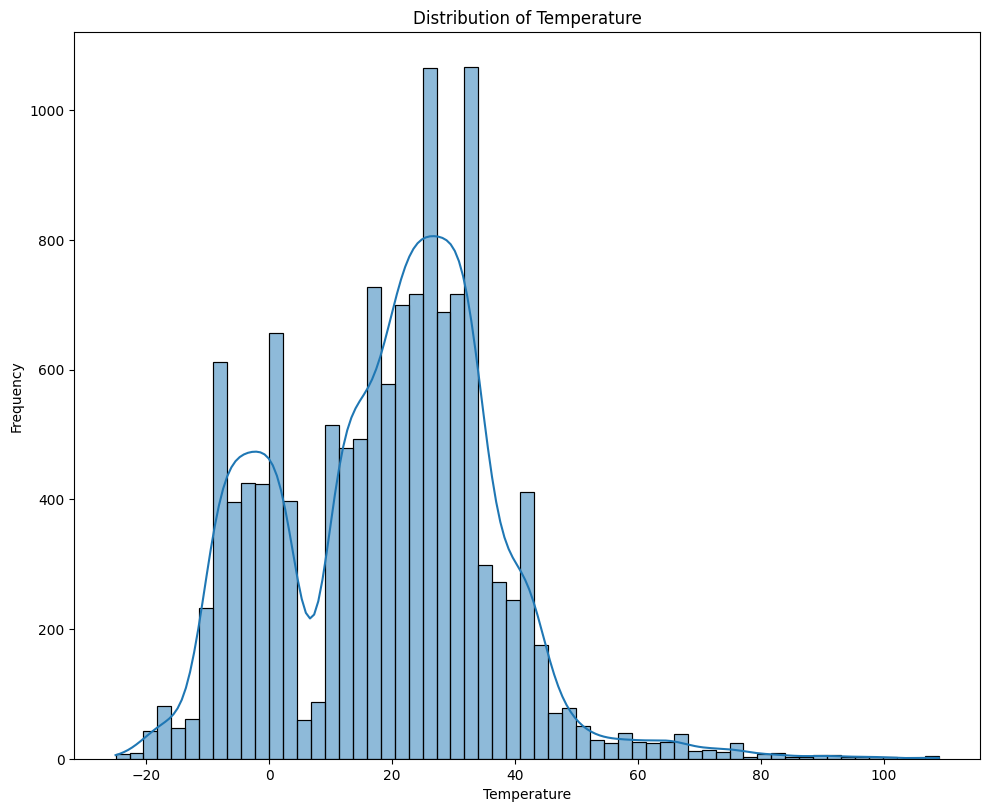

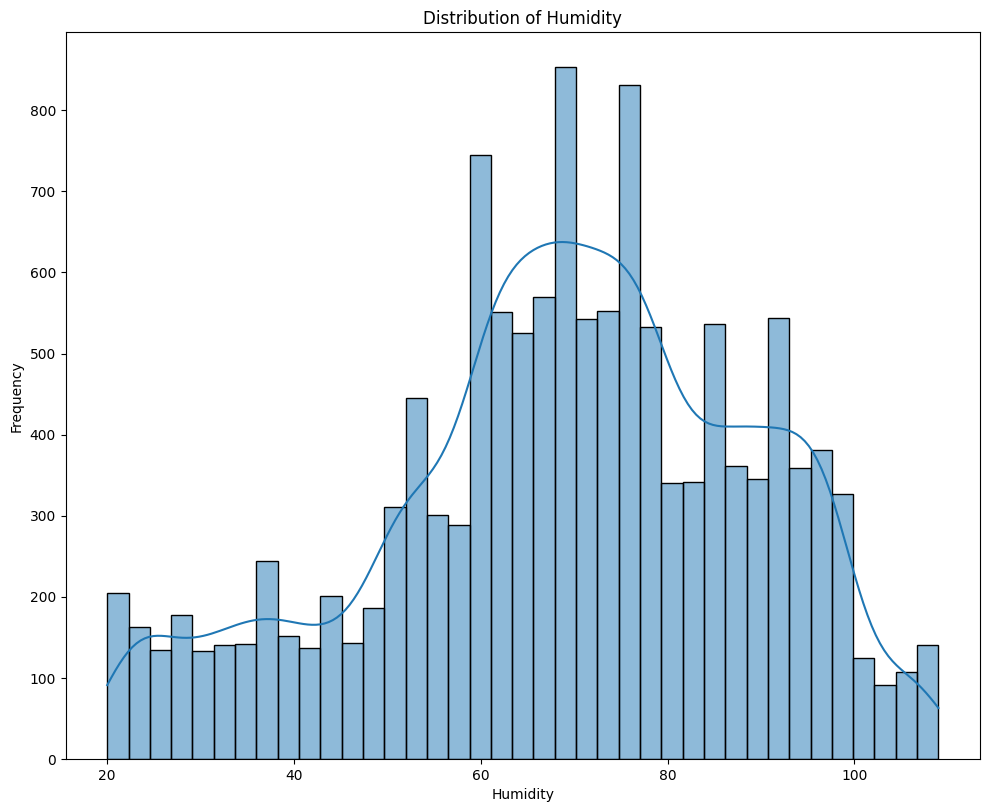

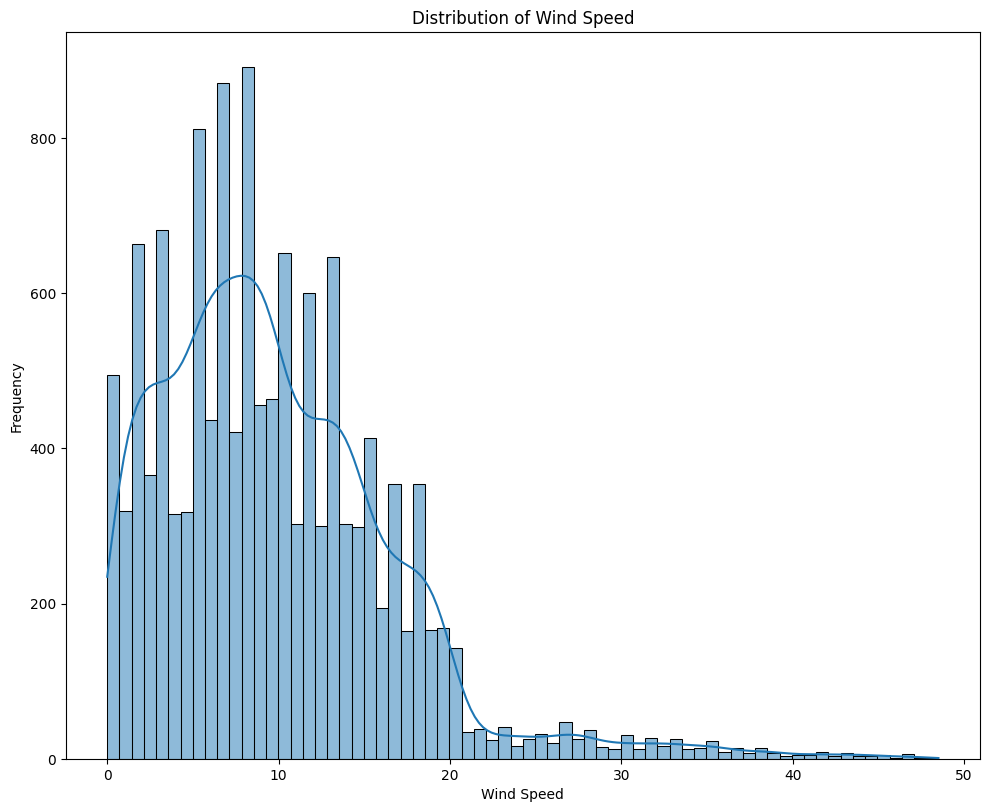

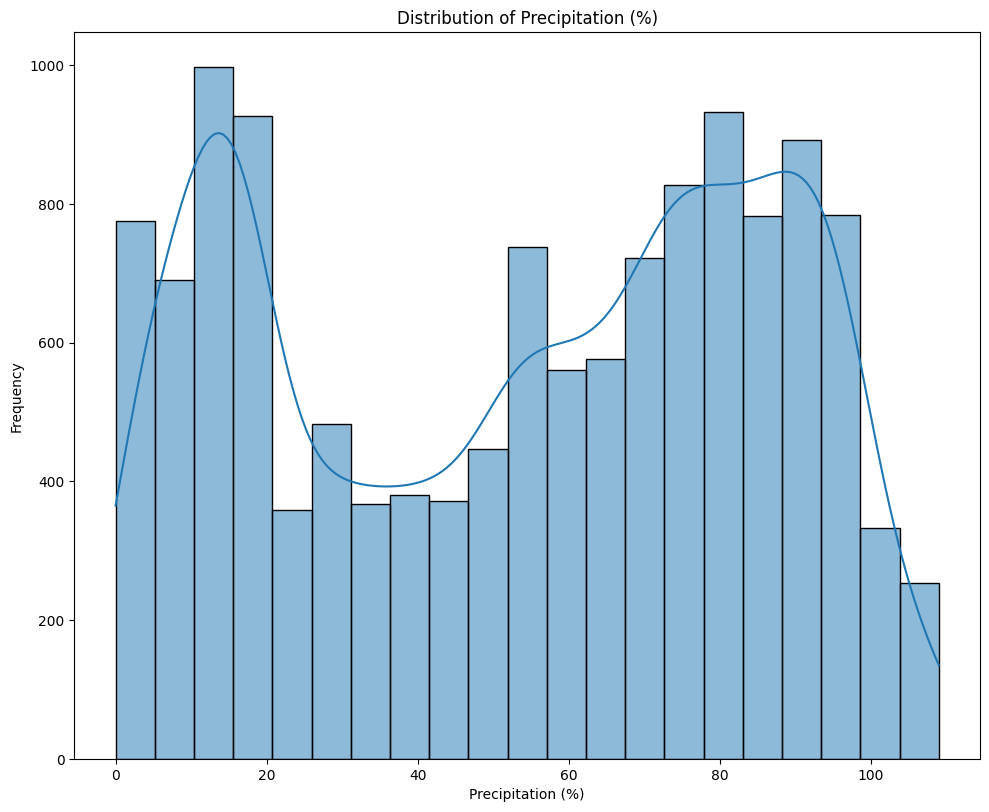

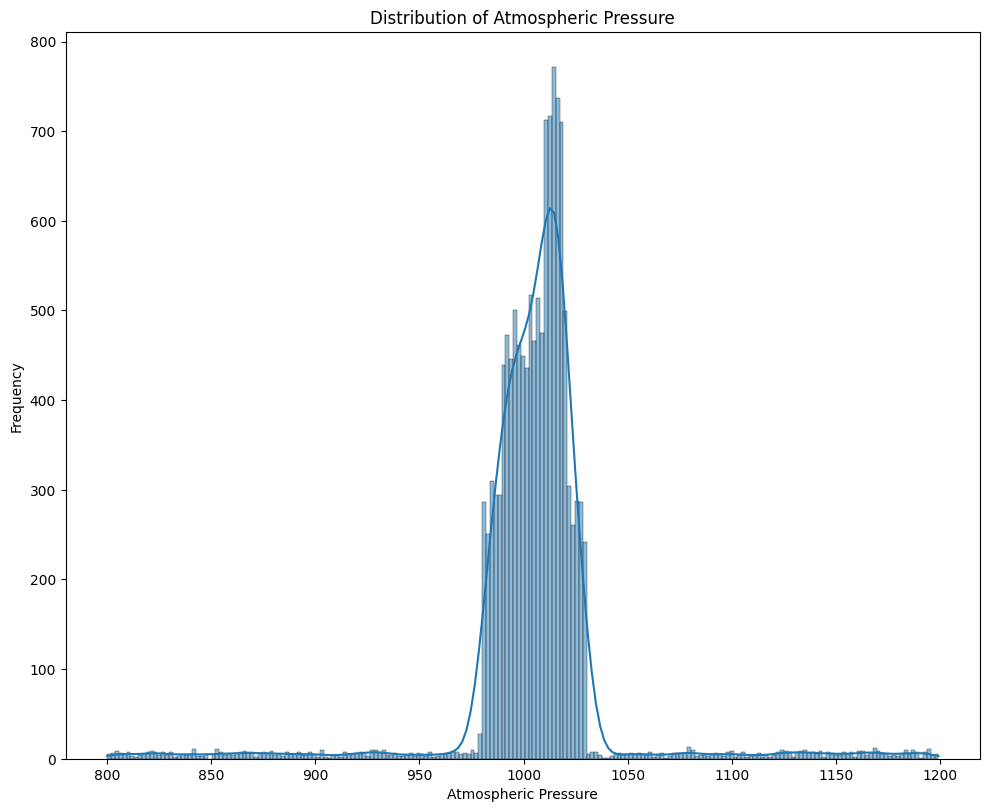

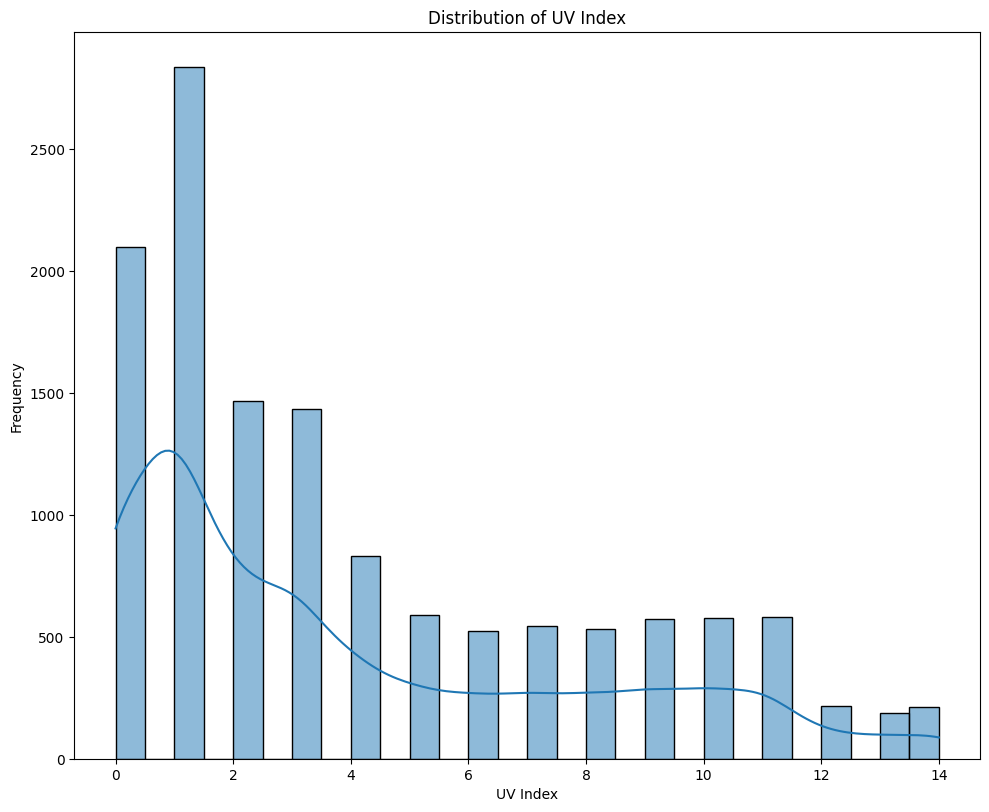

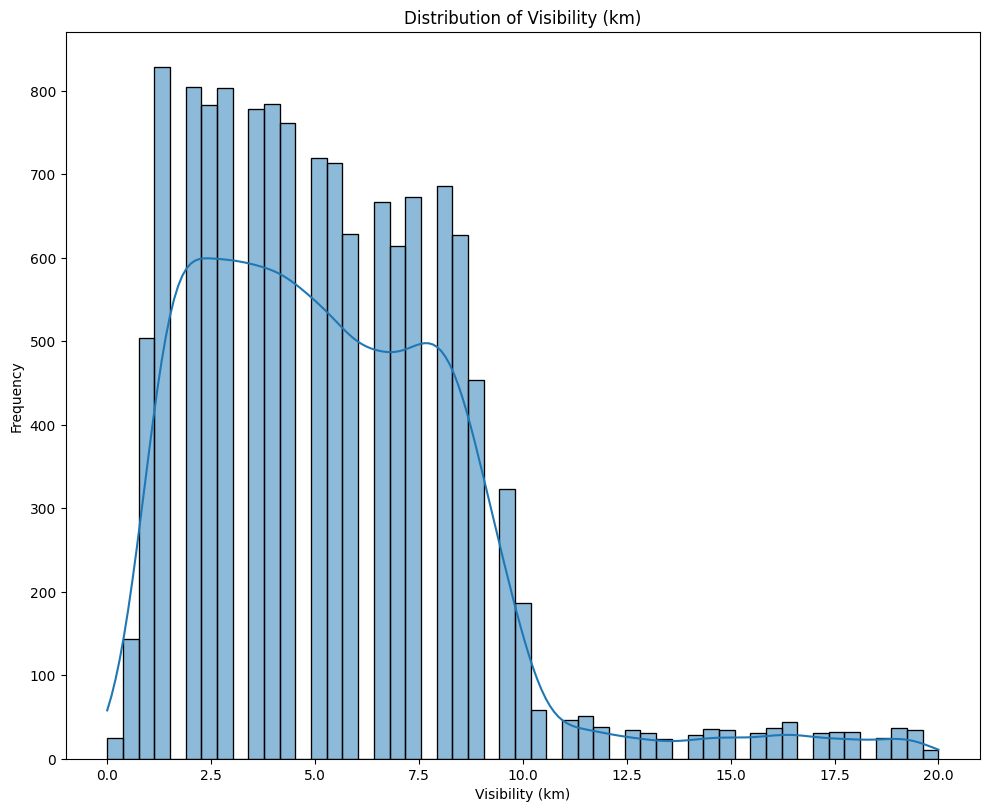

In [47]:
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                  'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

for col in numerical_cols:
  plt.figure(figsize=(10, 8))
  sns.histplot(df[col], kde=True)
  plt.tight_layout()
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

Cek Outlier Data

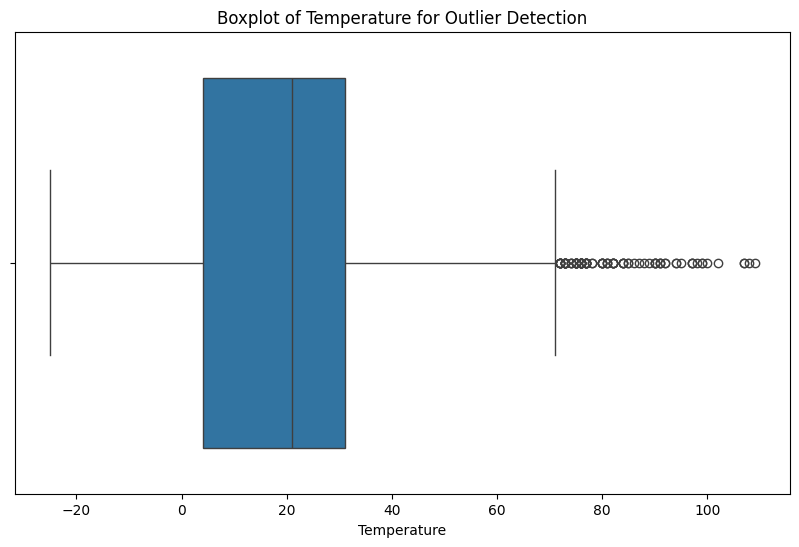

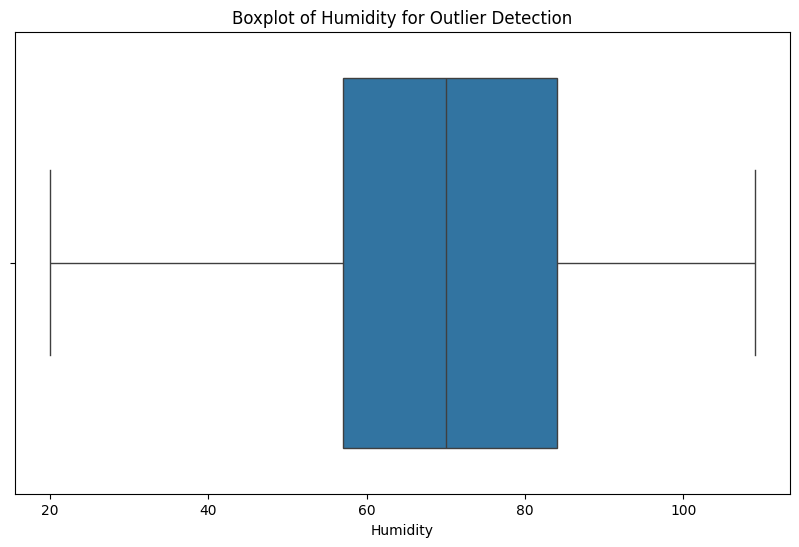

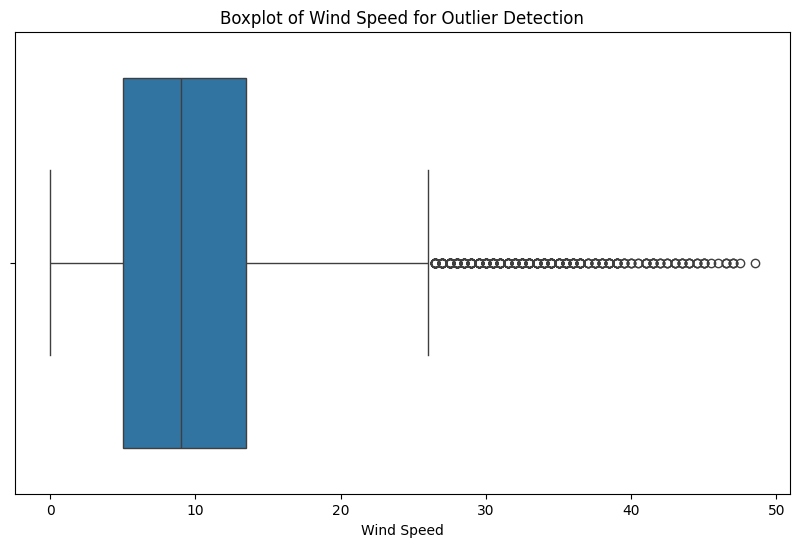

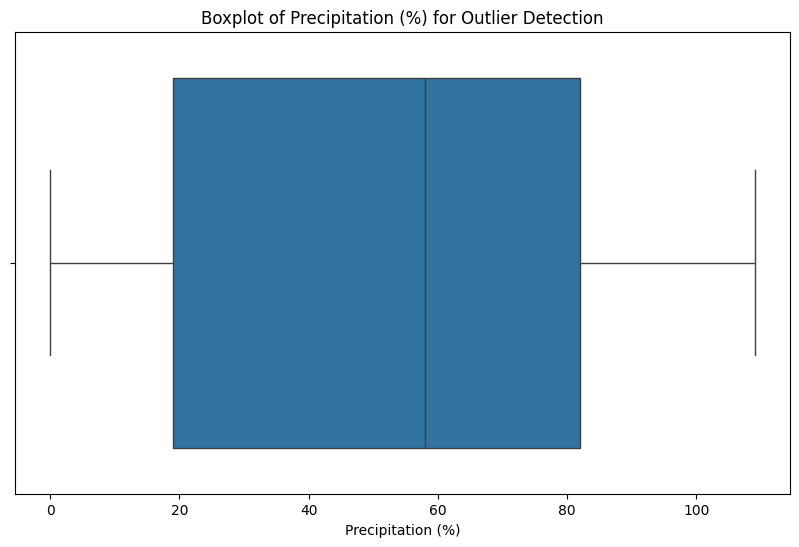

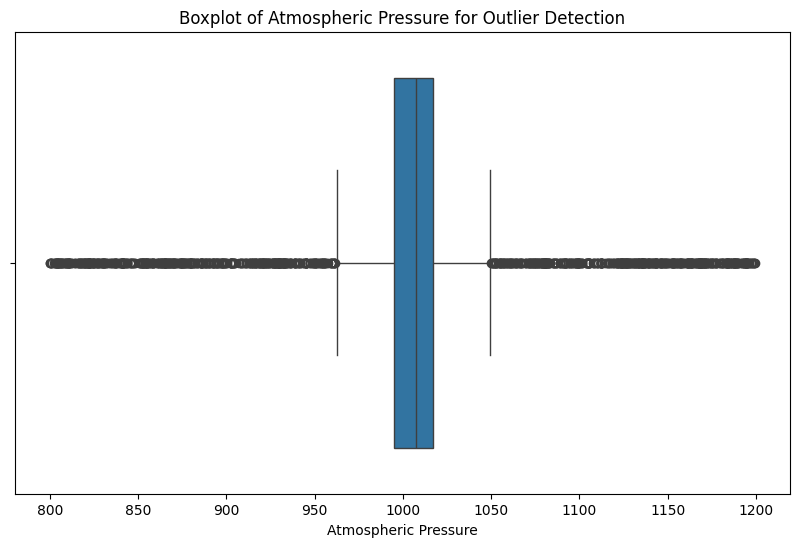

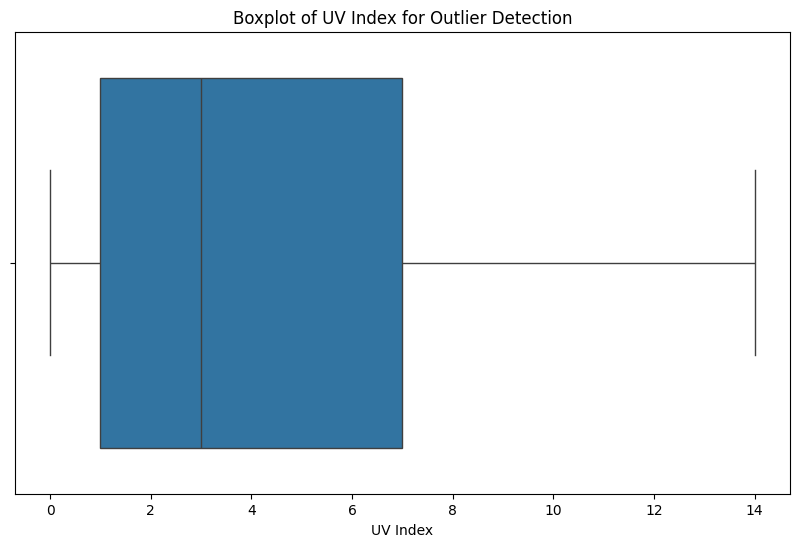

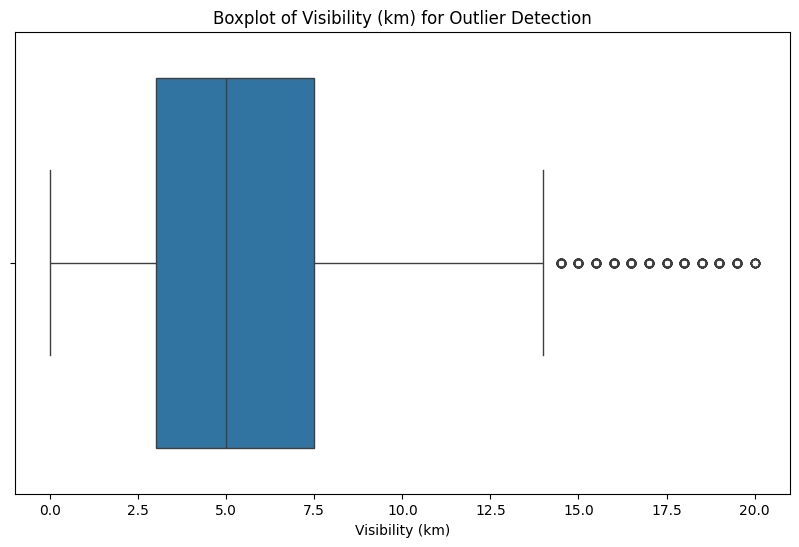

In [48]:
for col in numerical_cols:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col} for Outlier Detection')
  plt.xlabel(col)
  plt.show()

Cek Korelasi Antar Fitur

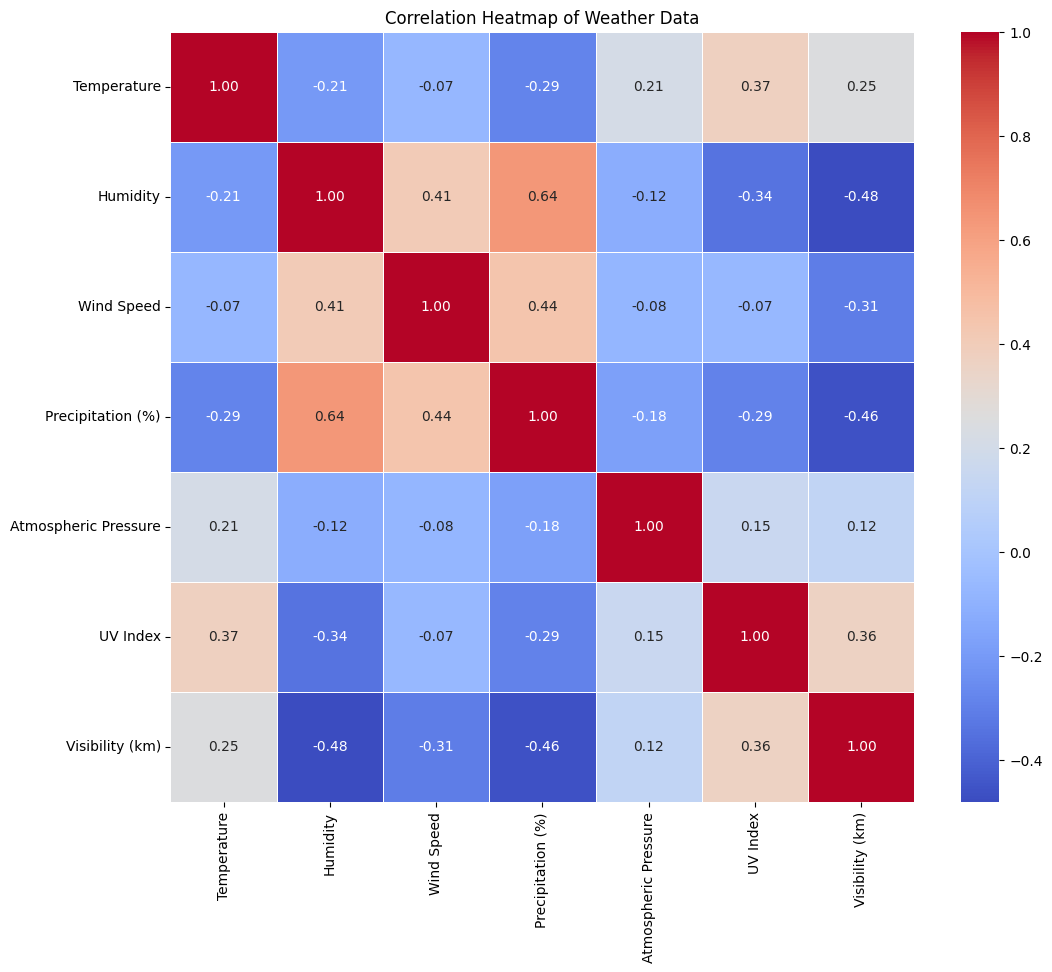

In [49]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Weather Data')
plt.show()

# Preprocessing

Preprocessing bertujuan untuk mempersiapkan data agar siap digunakan oleh model

Cek Unique Value dari Data Kategorikal

In [50]:
print(df['Cloud Cover'].unique())
print(df['Season'].unique())
print(df['Location'].unique())

['partly cloudy' 'clear' 'overcast' 'cloudy']
['Winter' 'Spring' 'Summer' 'Autumn']
['inland' 'mountain' 'coastal']


Encode data kategorikal menjadi numerik

In [51]:
df['Cloud Cover'] = df['Cloud Cover'].map({'partly cloudy':0 , 'clear':1, 'overcast':2, 'cloudy':3})
df['Season'] = df['Season'].map({'Winter':0, 'Spring':1, 'Summer':2, 'Autumn':3})
df['Location'] = df['Location'].map({'inland':0, 'mountain':1, 'coastal':2})

In [52]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,0,1010.82,2,0,3.5,0,Rainy
1,39.0,96,8.5,71.0,0,1011.43,7,1,10.0,0,Cloudy
2,30.0,64,7.0,16.0,1,1018.72,5,1,5.5,1,Sunny
3,38.0,83,1.5,82.0,1,1026.25,7,1,1.0,2,Sunny
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,1,Rainy


Menghapus Outlier

In [53]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

outlier_cols = ['Temperature', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)']
df = remove_outliers_iqr(df, outlier_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11689 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           11689 non-null  float64
 1   Humidity              11689 non-null  int64  
 2   Wind Speed            11689 non-null  float64
 3   Precipitation (%)     11689 non-null  float64
 4   Cloud Cover           11689 non-null  int64  
 5   Atmospheric Pressure  11689 non-null  float64
 6   UV Index              11689 non-null  int64  
 7   Season                11689 non-null  int64  
 8   Visibility (km)       11689 non-null  float64
 9   Location              11689 non-null  int64  
 10  Weather Type          11689 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 1.1+ MB


In [54]:
df['Weather Type'].value_counts()

,count
Weather Type,
Cloudy,2994
Sunny,2965
Snowy,2902
Rainy,2828


Hasil Visualisasi Boxplot Setelah Menghapus Outlier

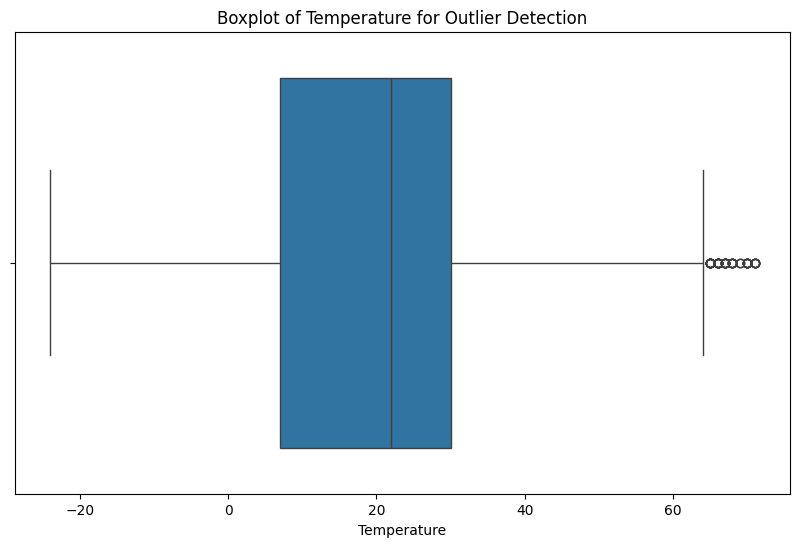

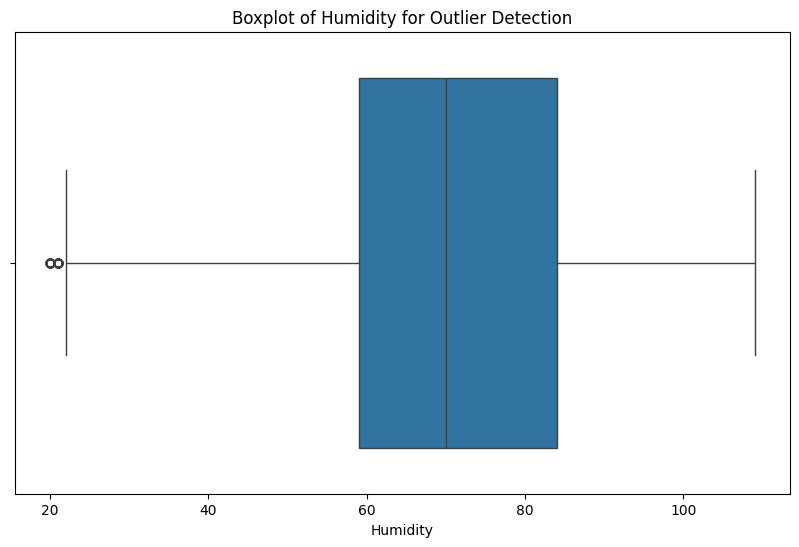

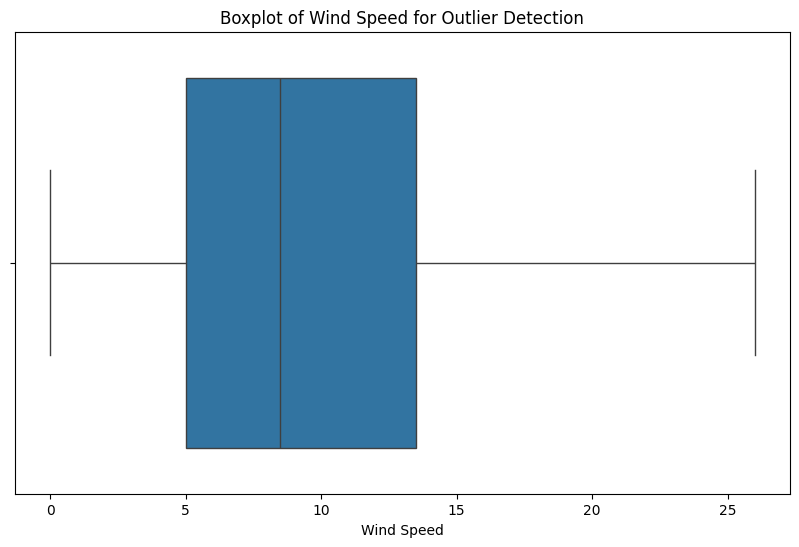

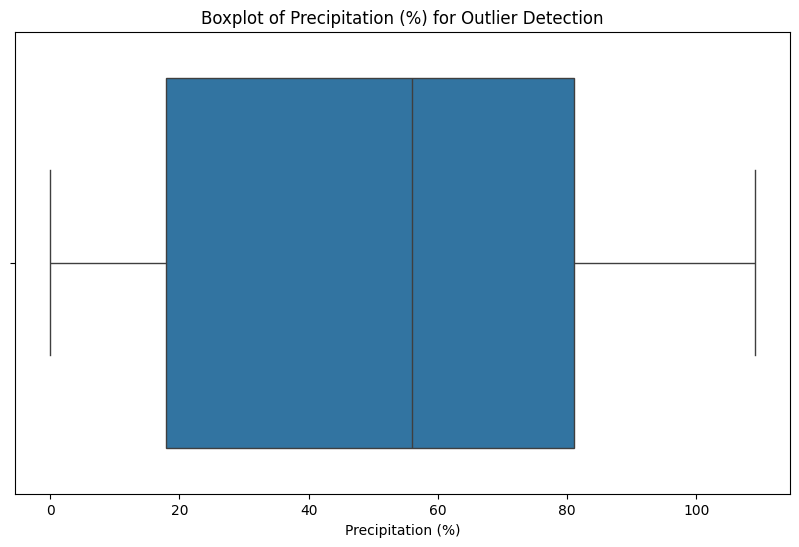

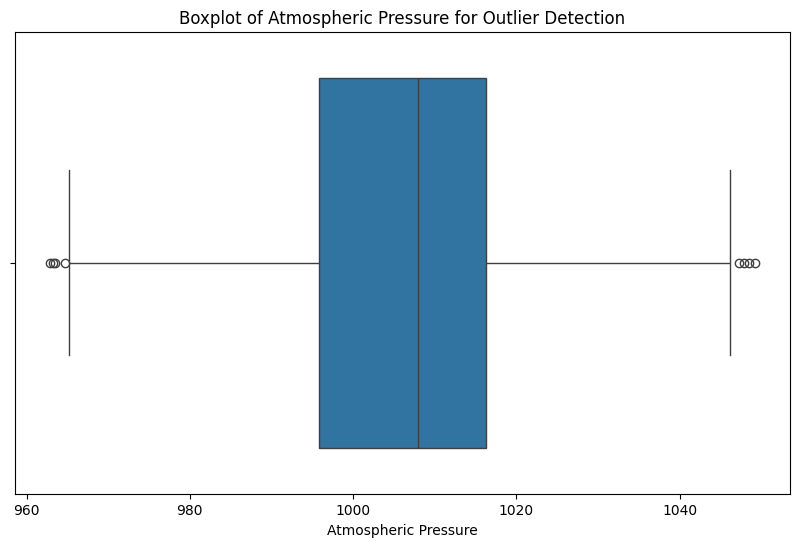

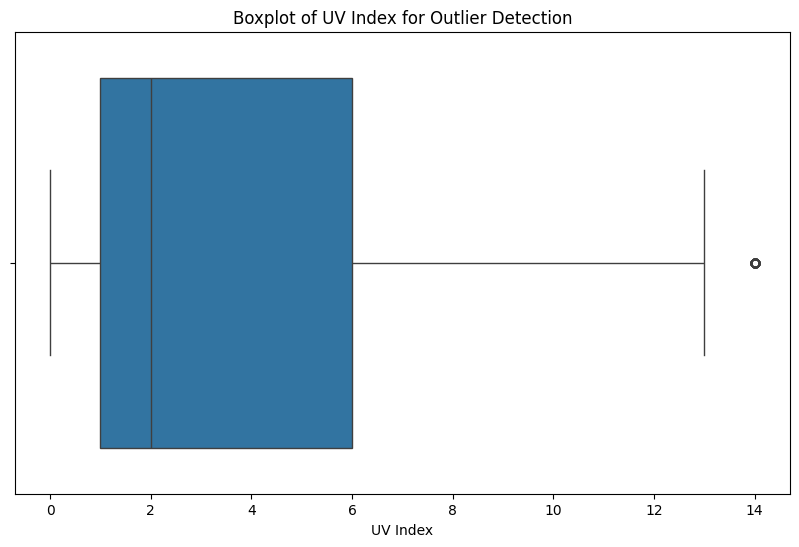

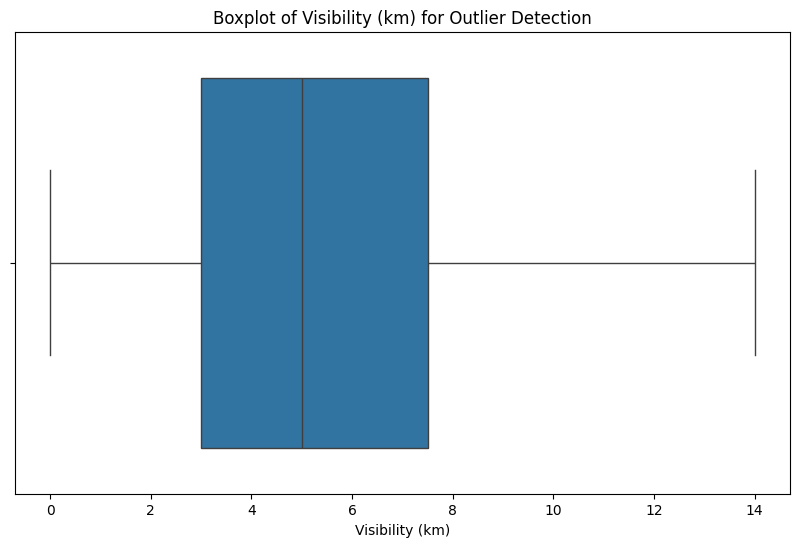

In [55]:
for col in numerical_cols:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col} for Outlier Detection')
  plt.xlabel(col)
  plt.show()

# Modeling

Memisahkan Label dan Fitur

In [56]:
X = df.drop(['Weather Type'], axis=1)
y = df['Weather Type']

Membagi Data

*   80% Data Latih
*   20% Data Tes

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

Fitting Data ke Model Menggunakan Model Random Forest

In [58]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# Evaluation

In [59]:
model.score(X_test, y_test)

0.9773310521813516

In [60]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

      Cloudy       0.95      0.98      0.96       615
       Rainy       0.97      0.97      0.97       554
       Snowy       1.00      0.98      0.99       571
       Sunny       0.99      0.99      0.99       598

    accuracy                           0.98      2338
   macro avg       0.98      0.98      0.98      2338
weighted avg       0.98      0.98      0.98      2338



Cek Feature Importance

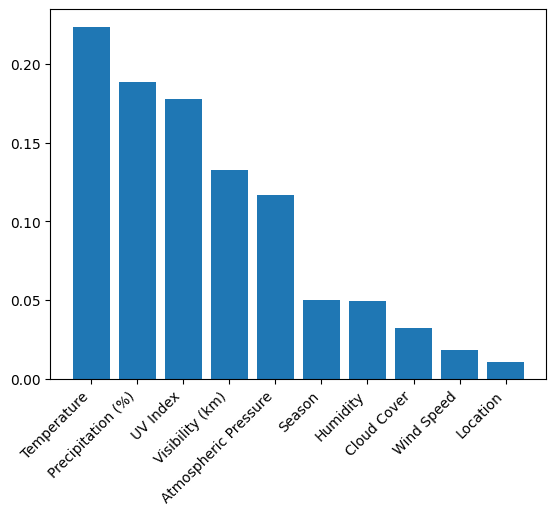

In [61]:
sorted_val = dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[1], reverse=True))

plt.bar(sorted_val.keys(), sorted_val.values())
plt.xticks(rotation=45, ha='right')
plt.show()

**Kesimpulan Projek**

Prediksi cuaca menggunakan model Random Forest dengan pembagian dataset yaitu 80% untuk data latih dan 20% data tes, mendapatkan Akurasi yang sangat baik sebesar **~97%** pada data tes.

3 fitur teratas yang berpengaruh pada model yaitu fitur **'Temperature', 'UV Index', 'Precipitation(%)'**. Sedangkan 3 fitur terbawahnya yaitu **'Location', 'Wind Speed', 'Cloud Cover'**